# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import pimmslearn
import pimmslearn.databases.diseases

logger = pimmslearn.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
pimmslearn.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "CF"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = pimmslearn.nb.get_params(args, globals=globals())
args = pimmslearn.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = pimmslearn.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'CF',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_CF'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_CF/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.298  1  0.554 0.458 0.003   
                             age        0.030  1  0.056 0.814 0.000   
                             Kiel       1.726  1  3.206 0.075 0.017   
                             Magdeburg  4.978  1  9.249 0.003 0.046   
                             Sweden     8.421  1 15.647 0.000 0.076   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.047  1  0.049 0.824 0.000   
                             age        0.681  1  0.717 0.398 0.004   
                             Kiel       0.017  1  0.018 0.893 0.000   
                             Magdeburg  2.130  1  2.245 0.136 0.012   
                             Sweden    12.107  1 12.758 0.000 0.063   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.340  0.616    False  
                             age               0.090  0.886    False  
                             Kiel              1.125  0.168    False  
                             Magdeburg         2.571  0.011     True  
                             Sweden            3.968  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.084  0.892    False  
                             age               0.400  0.561    False  
                             Kiel              0.049  0.939    False  
                             Magdeburg         0.867  0.264    False  
                             Sweden            3.348  0.003     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                      CF                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         1.049  1  7.600 0.006 0.038   
                             age        0.003  1  0.020 0.887 0.000   
                             Kiel       0.257  1  1.863 0.174 0.010   
                             Magdeburg  0.493  1  3.569 0.060 0.018   
                             Sweden     1.721  1 12.473 0.001 0.061   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         1.013  1  2.106 0.148 0.011   
                             age        0.658  1  1.367 0.244 0.007   
                             Kiel       1.925  1  4.002 0.047 0.021   
                             Magdeburg  1.122  1  2.332 0.128 0.012   
                             Sweden    18.285  1 38.008 0.000 0.166   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                2.194  0.019     True  
                             age               0.052  0.929    False  
                             Kiel              0.760  0.283    False  
                             Magdeburg         1.219  0.121    False  
                             Sweden            3.286  0.002     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.829  0.249    False  
                             age               0.613  0.368    False  
                             Kiel              1.329  0.099    False  
                             Magdeburg         0.891  0.223    False  
                             Sweden            8.387  0.000     True  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     CF                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.006         2.194  0.019     True   
                             Kiel      0.174         0.760  0.283    False   
                             Magdeburg 0.060         1.219  0.121    False   
                             Sweden    0.001         3.286  0.002     True   
                             age       0.887         0.052  0.929    False   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.148         0.829  0.249    False   
                             Kiel      0.047         1.329  0.099    False   
                             Magdeburg 0.128         0.891  0.223    False   
                             Sweden    0.000         8.387  0.000     True   
                             age       0.244         0.613  0.368    False   

model                                     PI                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.458         0.340  0.616    False  
                             Kiel      0.075         1.125  0.168    False  
                             Magdeburg 0.003         2.571  0.011     True  
                             Sweden    0.000         3.968  0.001     True  
                             age       0.814         0.090  0.886    False  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.824         0.084  0.892    False  
                             Kiel      0.893         0.049  0.939    False  
                             Magdeburg 0.136         0.867  0.264    False  
                             Sweden    0.000         3.348  0.003     True  
                             age       0.398         0.400  0.561    False  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = pimmslearn.nb.Config.from_dict(
    pimmslearn.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'CF': 'CF', 'PI': 'PI'}

## Describe scores

In [10]:
scores.describe()

model        CF                                PI                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.225         3.265     0.279     0.262         2.474     0.340
std       0.293         6.226     0.320     0.303         5.334     0.331
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.001         0.403     0.002     0.004         0.328     0.015
50%       0.063         1.204     0.125     0.125         0.905     0.249
75%       0.396         3.246     0.528     0.470         2.413     0.626
max       0.999        86.567     0.999     1.000       144.801     1.000

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

/tmp/ipykernel_34339/3761369923.py:2: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  scores.to_excel(writer, 'scores', **writer_args)


model                                                        CF                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.006         2.194   
A0A024R0T9;K7ER74;P02655                           AD     0.031         1.503   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.601         0.221   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.275         0.561   
A0A075B6H7                                         AD     0.003         2.565   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.163         0.788   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.691         0.161   
S4R3U6                                             AD     0.148         0.829   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.019     True   
A0A024R0T9;K7ER74;P02655                           AD      0.070    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.709    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.403    False   
A0A075B6H7                                         AD      0.009     True   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.285    False   
Q9Y6X5                                             AD      0.269    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.157    False   
Q9Y6Y9                                             AD      0.783    False   
S4R3U6                                             AD      0.249    False   

model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.458         0.340   
A0A024R0T9;K7ER74;P02655                           AD     0.045         1.349   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.083         1.082   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.533         0.273   
A0A075B6H7                                         AD     0.299         0.524   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.107         0.969   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.468         0.329   
S4R3U6                                             AD     0.824         0.084   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.616    False  
A0A024R0T9;K7ER74;P02655                           AD      0.112    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.182    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.683    False  
A0A075B6H7                                         AD      0.463    False  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        CF                                PI                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.235         1.602     0.296     0.259         1.394     0.342
std       0.289         1.869     0.313     0.294         1.598     0.320
min       0.000         0.001     0.000     0.000         0.000     0.000
25%       0.007         0.388     0.020     0.011         0.338     0.036
50%       0.084         1.078     0.158     0.131         0.883     0.257
75%       0.409         2.151     0.540     0.459         1.959     0.618
max       0.999        23.988     0.999     1.000        19.130     1.000

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,CF,PI
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,944,1029


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

CF                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.006         2.194  0.019   
A0A024R0T9;K7ER74;P02655                           0.031         1.503  0.070   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.601         0.221  0.709   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.275         0.561  0.403   
A0A075B6H7                                         0.003         2.565  0.009   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.285   
Q9Y6X5                                             0.163         0.788  0.269   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.157   
Q9Y6Y9                                             0.691         0.161  0.783   
S4R3U6                                             0.148         0.829  0.249   

                                                               PI  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                           True 0.458   
A0A024R0T9;K7ER74;P02655                              False 0.045   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.083   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.533   
A0A075B6H7                                             True 0.299   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.107   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.468   
S4R3U6                                                False 0.824   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               0.340  0.616   
A0A024R0T9;K7ER74;P02655                                   1.349  0.112   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         1.082  0.182   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.273  0.683   
A0A075B6H7                                                 0.524  0.463   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.318   
Q9Y6X5                                                     0.969  0.224   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.182   
Q9Y6Y9                                                     0.329  0.625   
S4R3U6                                                     0.084  0.892   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                            False        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
CF (no)  - PI (no)    882
CF (yes) - PI (yes)   330
CF (yes) - PI (no)    147
CF (no)  - PI (yes)    62
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

/tmp/ipykernel_34339/1417621106.py:6: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  _to_write.to_excel(writer, 'differences', **writer_args)
root - INFO     Writen to Excel file under sheet 'differences'.


CF                                  PI  \
                             p-unc -Log10 pvalue qvalue rejected p-unc   
protein groups                                                           
A0A024QZX5;A0A087X1N8;P35237 0.006         2.194  0.019     True 0.458   
A0A075B6H7                   0.003         2.565  0.009     True 0.299   
A0A075B6I0                   0.001         3.078  0.003     True 0.019   
A0A075B6J9                   0.007         2.136  0.021     True 0.037   
A0A075B6R2                   0.001         3.165  0.003     True 0.281   
...                            ...           ...    ...      ...   ...   
Q9UNW1                       0.723         0.141  0.809    False 0.006   
Q9UP79                       0.000         4.104  0.000     True 0.170   
Q9UQ52                       0.001         3.258  0.002     True 0.114   
Q9Y281;Q9Y281-3              0.021         1.672  0.051    False 0.012   
Q9Y6C2                       0.017         1.764  0.043     True 0.977   

                                                                data  
                             -Log10 pvalue qvalue rejected frequency  
protein groups                                                        
A0A024QZX5;A0A087X1N8;P35237         0.340  0.616    False       186  
A0A075B6H7                           0.524  0.463    False        91  
A0A075B6I0                           1.721  0.057    False       194  
A0A075B6J9                           1.432  0.097    False       156  
A0A075B6R2                           0.552  0.443    False       164  
...                                    ...    ...      ...       ...  
Q9UNW1                               2.206  0.023     True       171  
Q9UP79                               0.769  0.312    False       135  
Q9UQ52                               0.943  0.234    False       188  
Q9Y281;Q9Y281-3                      1.912  0.040     True        51  
Q9Y6C2                               0.010  0.985    False       119  

[209 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,CF,PI,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.019,0.616,186,CF (yes) - PI (no)
A0A024R0T9;K7ER74;P02655,0.070,0.112,195,CF (no) - PI (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.709,0.182,174,CF (no) - PI (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.403,0.683,196,CF (no) - PI (no)
A0A075B6H7,0.009,0.463,91,CF (yes) - PI (no)
...,...,...,...,...
Q9Y6R7,0.285,0.318,197,CF (no) - PI (no)
Q9Y6X5,0.269,0.224,173,CF (no) - PI (no)
Q9Y6Y8;Q9Y6Y8-2,0.157,0.182,197,CF (no) - PI (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,CF,PI,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
Q9Y6C2,0.043,0.985,119,CF (yes) - PI (no),0.943
Q9HBW1,0.024,0.967,137,CF (yes) - PI (no),0.943
Q6UWP8,0.022,0.959,59,CF (yes) - PI (no),0.936
E9PKE3;P11142,0.939,0.009,158,CF (no) - PI (yes),0.930
P05556;P05556-2;P05556-3;P05556-4;P05556-5,0.012,0.942,76,CF (yes) - PI (no),0.930
...,...,...,...,...,...
F5GY80;F5H7G1;P07358,0.047,0.057,197,CF (yes) - PI (no),0.011
Q9NX62,0.045,0.056,197,CF (yes) - PI (no),0.011
P00740;P00740-2,0.043,0.053,197,CF (yes) - PI (no),0.010


### Differences plotted with created annotations

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_CF/diff_analysis_comparision_1_CF


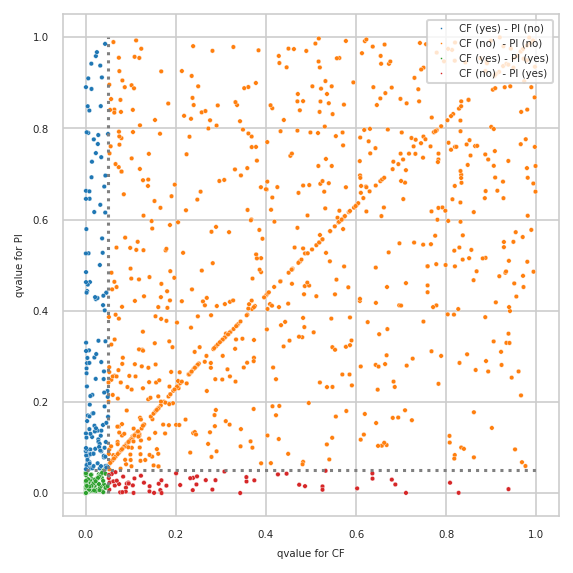

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
pimmslearn.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_CF/diff_analysis_comparision_2_CF


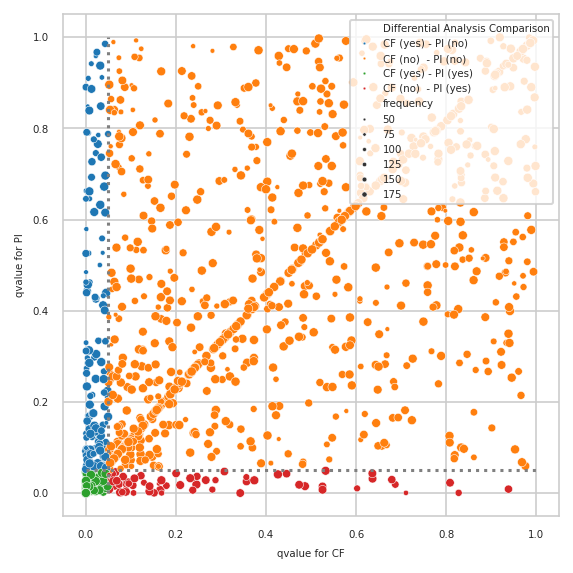

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
pimmslearn.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = pimmslearn.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

pimmslearn.databases.diseases - WARNING  There are more associations available


,ENSP,score
None,,
APP,ENSP00000284981,5.000
PSEN1,ENSP00000326366,5.000
PSEN2,ENSP00000355747,5.000
APOE,ENSP00000252486,5.000
MAPT,ENSP00000340820,4.800
...,...,...
MRPL1,ENSP00000315017,0.681
AASS,ENSP00000403768,0.681
MOB4,ENSP00000315702,0.681


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

/home/runner/work/pimms/pimms/project/.snakemake/conda/924ec7e362d761ecf0807b9074d79999_/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out